In [1]:
# import the necessary library
import sqlite3 , csv
import pandas as pd
import numpy as np

In [2]:
#load the sql magic for jupyter
%load_ext sql

In [3]:
# connect to database since the database is already created.
con = sqlite3.connect("Data_science.db")

In [4]:
# create a cursor object
cur = con.cursor()

In [5]:
# connect the sql magic to sqlite3 database
%sql sqlite:///Data_science.db

In [6]:
# test if the connection is successful by retrieving datas from sql.
%sql SELECT * FROM data_scientist LIMIT 5;

 * sqlite:///Data_science.db
Done.


Work_Year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df1 = %sql SELECT company_size,salary_in_usd FROM data_scientist;

 * sqlite:///Data_science.db
Done.


In [8]:
#convert the sql table to pandas dataframe
df2 =df1.DataFrame()

In [9]:
#check the data
df2.head()

,company_size,salary_in_usd
0,L,85847
1,S,30000
2,S,25500
3,M,175000
4,M,120000


In [10]:
#check the type of data.
df2.dtypes

company_size     object
salary_in_usd     int64
dtype: object

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
#set the company size as index
df2.set_index('company_size',inplace = True)

In [13]:
df2.head()

,salary_in_usd
company_size,
L,85847
S,30000
S,25500
M,175000
M,120000


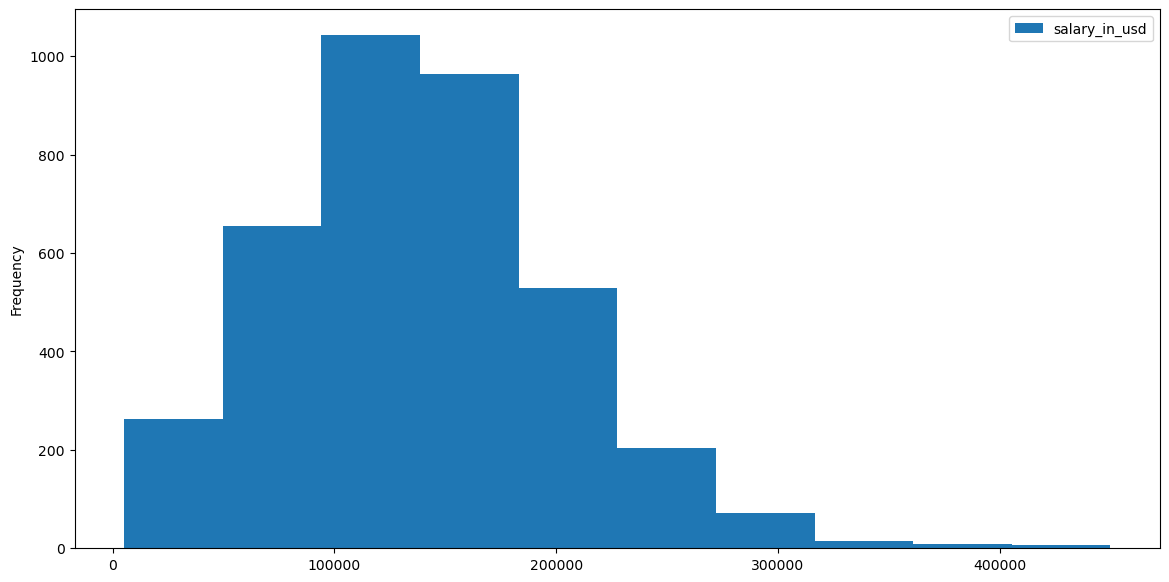

In [14]:
df2.plot(kind = 'hist', figsize = (14,7))
plt.show()

In [15]:
df = %sql SELECT job_title,salary_in_usd FROM data_scientist WHERE company_location = 'US' ORDER BY salary_in_usd DESC LIMIT 10;

 * sqlite:///Data_science.db
Done.


In [16]:
df3=df.DataFrame()
df3.head()
df3.set_index('job_title', inplace = True)

In [17]:
df3.head()

,salary_in_usd
job_title,
Research Scientist,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000


In [18]:
df3.rename(columns={'salary_in_usd': 'Salary in USD'},inplace = True)

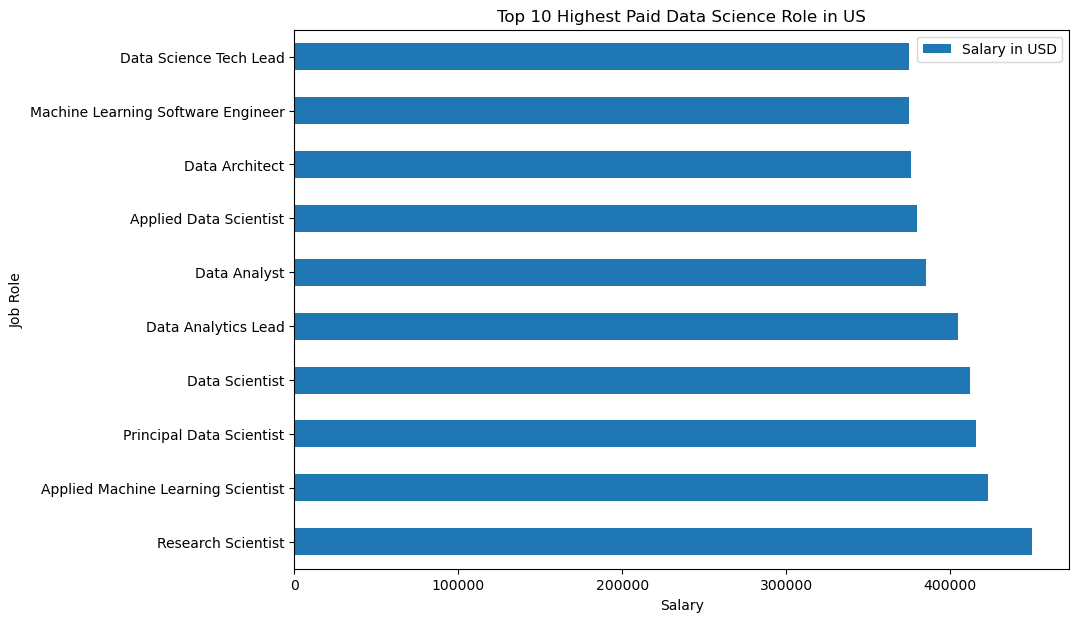

In [19]:
df3.plot(kind = 'barh', figsize = (10,7))
plt.title("Top 10 Highest Paid Data Science Role in US")
plt.ylabel("Job Role")
plt.xlabel("Salary")
plt.show()

In [20]:
df3 = %sql SELECT job_title FROM data_scientist;

 * sqlite:///Data_science.db
Done.


In [21]:
df4 = df3.DataFrame()

In [22]:
df4.head()

,job_title
0,Principal Data Scientist
1,ML Engineer
2,ML Engineer
3,Data Scientist
4,Data Scientist


In [23]:
#check the columns
df4.columns

Index(['job_title'], dtype='object')

In [24]:
#retrieve the column as series with one square bracket
df4['job_title']

0       Principal Data Scientist
1                    ML Engineer
2                    ML Engineer
3                 Data Scientist
4                 Data Scientist
                  ...           
3750              Data Scientist
3751    Principal Data Scientist
3752              Data Scientist
3753       Business Data Analyst
3754        Data Science Manager
Name: job_title, Length: 3755, dtype: object

In [25]:
# determine the data type if its object or int
df4.dtypes

job_title    object
dtype: object

In [26]:
# convert pandas dataframe to series using the one square bracket and join it '' empty text using the join function
text = ' '.join(df4['job_title'])


In [27]:
print(text)

Principal Data Scientist ML Engineer ML Engineer Data Scientist Data Scientist Applied Scientist Applied Scientist Data Scientist Data Scientist Data Scientist Data Scientist Data Analyst Data Analyst Applied Scientist Applied Scientist Data Modeler Data Modeler Data Scientist Data Scientist Data Analyst Data Analyst Research Engineer Research Engineer Analytics Engineer Analytics Engineer Business Intelligence Engineer Business Intelligence Engineer Machine Learning Engineer Machine Learning Engineer Data Strategist Data Strategist Data Engineer Data Engineer Computer Vision Engineer Computer Vision Engineer Data Engineer Data Engineer Data Analyst Data Analyst Data Quality Analyst Compliance Data Analyst Machine Learning Engineer Applied Scientist Applied Scientist Data Engineer Data Engineer Data Scientist Data Scientist Data Scientist Data Scientist Data Scientist Data Scientist Data Scientist Data Scientist Data Engineer Data Engineer Research Engineer Research Engineer Data Scien

### Create a word cloud

In [28]:
import wordcloud

In [29]:
from wordcloud import WordCloud

In [30]:
grap1 = WordCloud(background_color = 'white', max_words = 3770)
grap1.generate(text)

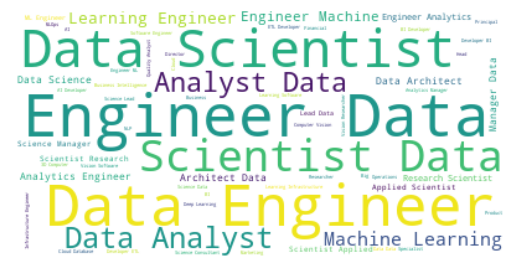

In [31]:
plt.imshow(grap1, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [32]:
%sql SELECT COUNT(job_title) FROM  data_scientist WHERE job_title = 'Data Scientist';

 * sqlite:///Data_science.db
Done.


COUNT(job_title)
840


In [33]:
%sql SELECT COUNT(job_title) FROM  data_scientist WHERE job_title = 'Data Analyst';

 * sqlite:///Data_science.db
Done.


COUNT(job_title)
612


In [34]:
%sql SELECT COUNT(job_title) FROM  data_scientist WHERE job_title = 'Data Engineer';

 * sqlite:///Data_science.db
Done.


COUNT(job_title)
1040


In [35]:
%sql SELECT COUNT(job_title) FROM  data_scientist WHERE job_title = 'Machine Learning Engineer';

 * sqlite:///Data_science.db
Done.


COUNT(job_title)
289


### Boxplot Visualization

In [36]:
datf = %sql SELECT job_title,salary_in_usd FROM data_scientist WHERE job_title = 'Data Scientist';

 * sqlite:///Data_science.db
Done.


In [37]:
datf2 = datf.DataFrame()
datf2.head()

,job_title,salary_in_usd
0,Data Scientist,175000
1,Data Scientist,120000
2,Data Scientist,219000
3,Data Scientist,141000
4,Data Scientist,147100


In [38]:
datf2.transpose()

,0,1,2,3,4,5,6,7,8,9,...,830,831,832,833,834,835,836,837,838,839
job_title,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,...,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist,Data Scientist
salary_in_usd,175000,120000,219000,141000,147100,90700,170000,150000,212750,185000,...,46809,91237,62726,115000,73000,118000,138350,119059,412000,105000


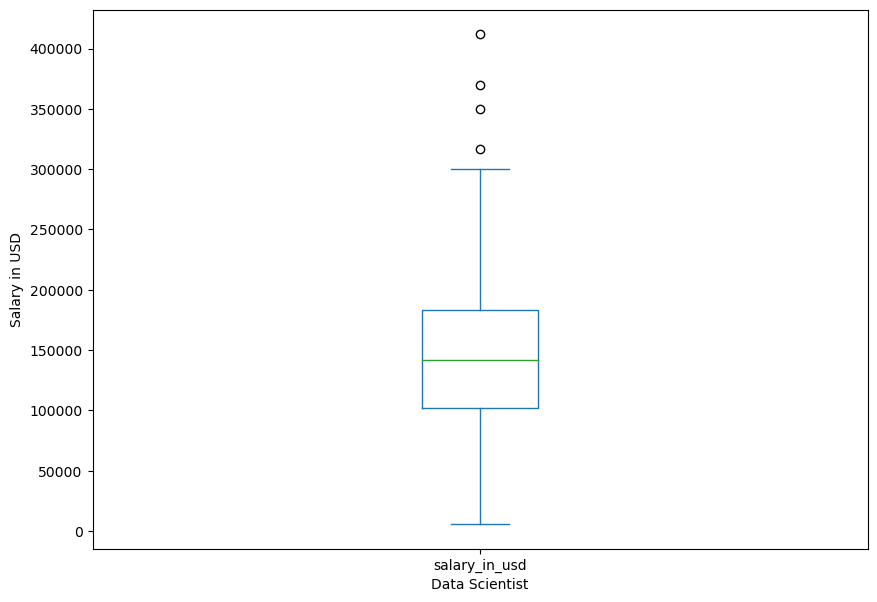

In [39]:
# from the lab there is some discrepancy in label.
datf2.plot(kind = 'box', figsize=(10,7))
plt.xlabel('Data Scientist')
plt.ylabel('Salary in USD')
plt.show()

In [40]:
datf2.head()

,job_title,salary_in_usd
0,Data Scientist,175000
1,Data Scientist,120000
2,Data Scientist,219000
3,Data Scientist,141000
4,Data Scientist,147100


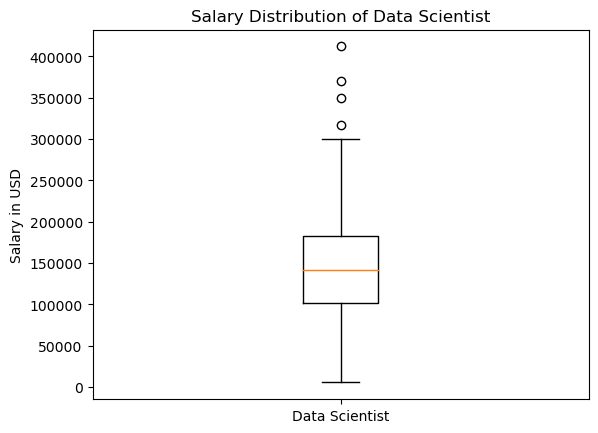

In [41]:
# with some reference to chatgpt AI chatbot on how to fix the issue in labelling it was resolve with ease using the following code belo
# Create the box plot
plt.boxplot(datf2['salary_in_usd'])

# set the x-axis labels to be name
plt.xticks([1],[datf2['job_title'][0]])

#add label 
plt.title("Salary Distribution of Data Scientist")
plt.ylabel("Salary in USD")

plt.show()

In [42]:
ML = %sql SELECT job_title,salary_in_usd FROM data_scientist WHERE job_title = 'Data Analyst';
ml = ML.DataFrame()
ml.head()

 * sqlite:///Data_science.db
Done.


,job_title,salary_in_usd
0,Data Analyst,130000
1,Data Analyst,100000
2,Data Analyst,150000
3,Data Analyst,110000
4,Data Analyst,105380


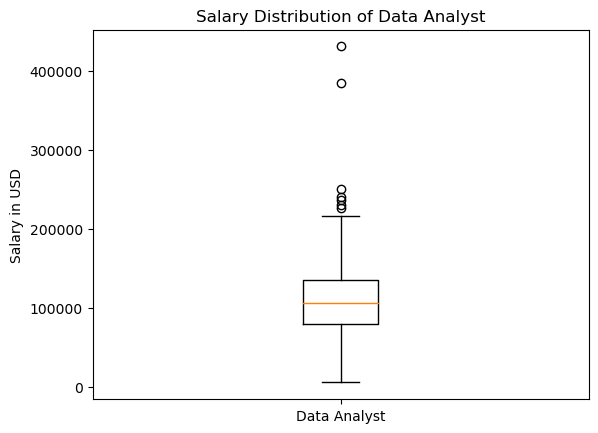

In [43]:
plt.boxplot(ml['salary_in_usd'])

plt.xticks([1],[ml['job_title'][0]])

plt.title("Salary Distribution of Data Analyst")
plt.ylabel("Salary in USD")

plt.show()

In [44]:
MLE = %sql SELECT job_title, salary_in_usd FROM  data_scientist WHERE job_title = 'Machine Learning Engineer';

 * sqlite:///Data_science.db
Done.


In [45]:
mle = MLE.DataFrame()
mle.head()

,job_title,salary_in_usd
0,Machine Learning Engineer,200000
1,Machine Learning Engineer,130000
2,Machine Learning Engineer,20984
3,Machine Learning Engineer,150000
4,Machine Learning Engineer,96578


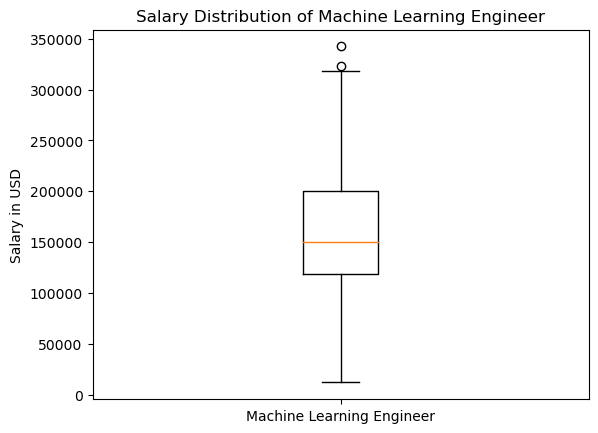

In [46]:
plt.boxplot(mle['salary_in_usd'])

plt.xticks([1],[mle['job_title'][0]])

plt.title("Salary Distribution of Machine Learning Engineer")
plt.ylabel("Salary in USD")

plt.show()

In [47]:
aid = %sql SELECT job_title, salary_in_usd FROM data_scientist WHERE job_title = 'AI Developer';
aid1 = aid.DataFrame()
aid1.head()

 * sqlite:///Data_science.db
Done.


,job_title,salary_in_usd
0,AI Developer,300000
1,AI Developer,75020
2,AI Developer,200000
3,AI Developer,275000
4,AI Developer,108000


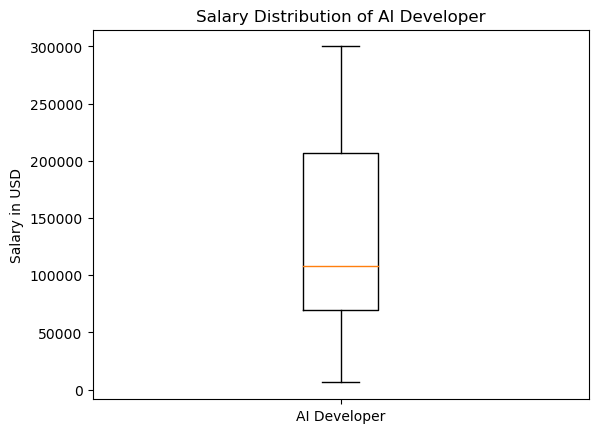

In [49]:
plt.boxplot(aid1['salary_in_usd'])

plt.xticks([1],[aid1['job_title'][0]])

plt.title("Salary Distribution of AI Developer")
plt.ylabel("Salary in USD")

plt.show()